<a href="https://colab.research.google.com/github/syildirim0/machine_learning/blob/main/BikeStoreSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv')

In [4]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [5]:
df.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [6]:

df=pd.read_csv('https://raw.githubusercontent.com/ine-rmotr-curriculum/FreeCodeCamp-Pandas-Real-Life-Example/master/data/sales_data.csv', parse_dates=['Date'])

In [7]:

df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [8]:
df['Customer_Age'].mean

<bound method Series.mean of 0         19
1         19
2         49
3         49
4         47
          ..
113031    41
113032    18
113033    18
113034    37
113035    37
Name: Customer_Age, Length: 113036, dtype: int64>

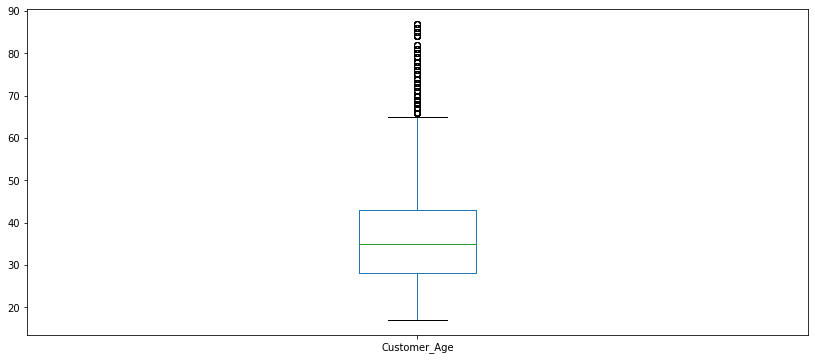

In [9]:
df['Customer_Age'].plot(kind='box', vert='False',figsize=(14,6))


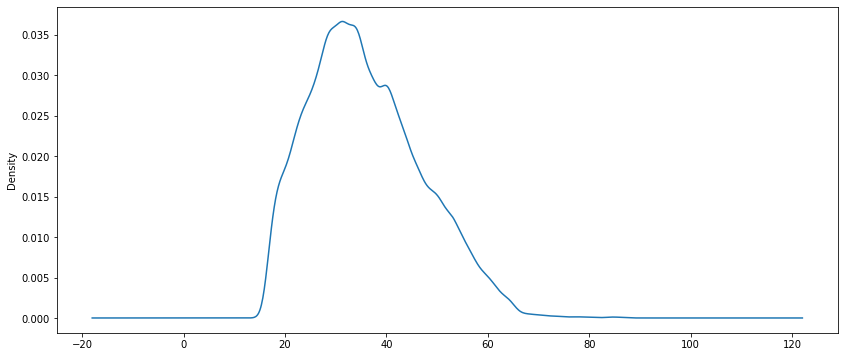

In [10]:
df['Customer_Age'].plot(kind='kde',figsize=(14,6))

In [53]:


df['Order_Quantity'].mean()

11.901659648253654

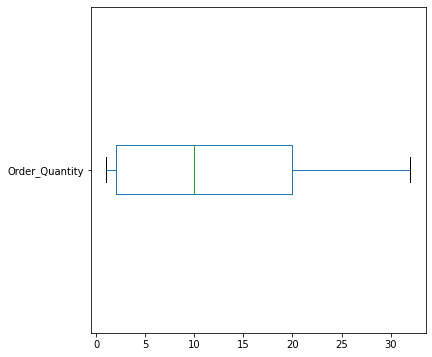

In [52]:


#Go ahead and show a histogram and a box plot with the Order_Quantity data:
df['Order_Quantity'].plot.box(figsize=(6,6),vert=False)

In [ ]:


df['Order_Quantity'].plot.hist(figsize=(6,6),bins=30)

In [12]:

#How many sales per year do we have?
df['Year'].value_counts()

2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: Year, dtype: int64

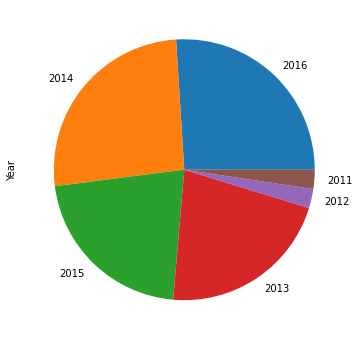

In [13]:
#Go ahead and show a pie plot with the previous data:
df['Year'].value_counts().plot.pie(figsize=(6,6))

In [14]:



#How many sales per month do we have?
df['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

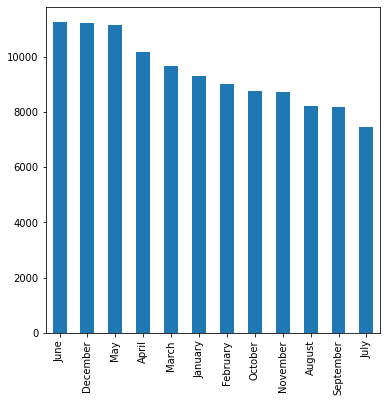

In [15]:
#Go ahead and show a bar plot with the previous data:
df['Month'].value_counts().plot.bar(figsize=(6,6))

In [16]:
#Which country has the most sales quantity of sales?
df['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

In [17]:
ax=df['Country'].value_counts()
max([ax])

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

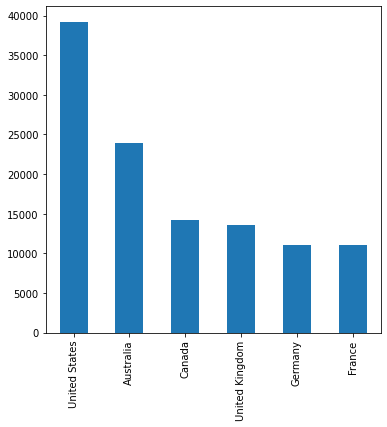

In [18]:
#Go ahead and show a bar plot of the sales per country:
df['Country'].value_counts().plot.bar(figsize=(6,6)
                                      )

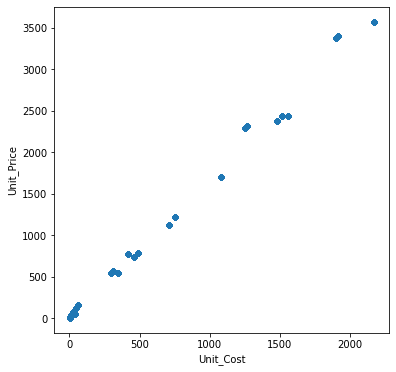

In [19]:

#Can you see any relationship between Unit_Cost and Unit_Price?
df.plot.scatter(x='Unit_Cost',y='Unit_Price',figsize=(6,6))

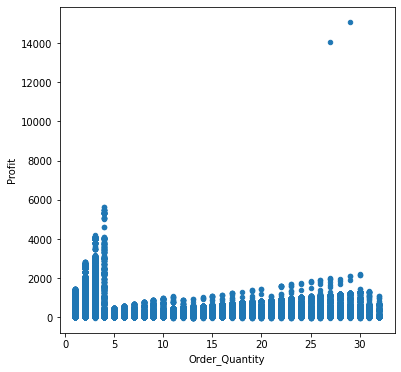

In [20]:
#can you see any relationship between Order_Quantity and Profit?
df.plot.scatter(x='Order_Quantity',y='Profit',figsize=(6,6))


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Profit')

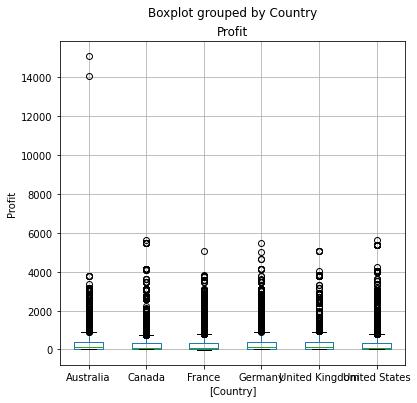

In [21]:
#Can you see any relationship between Profit per Country?
ax=df[['Profit','Country']].boxplot(by='Country',figsize=(6,6))
ax.set_ylabel('Profit')


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Customer_Age')

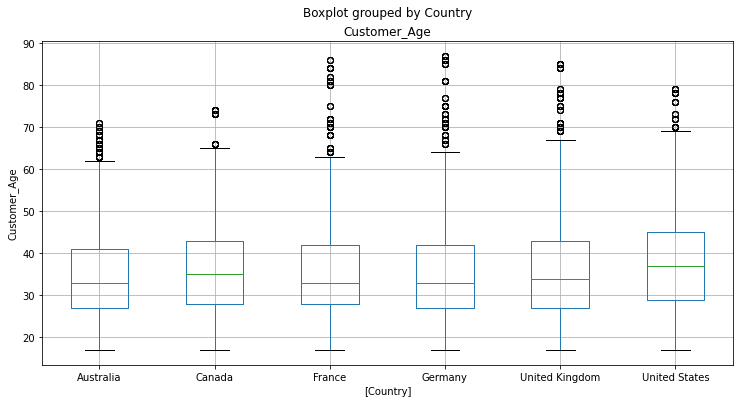

In [22]:
#Can you see any relationship between the Customer_Age per Country?
df[['Customer_Age','Country']].boxplot(by='Country',figsize=(12,6)).set_ylabel('Customer_Age')

In [23]:

df['calculated_data']=df[['Year','Month','Day']].apply(lambda x:'{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)

In [24]:
df['calculated_data'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: calculated_data, dtype: object

In [25]:
#Parse your Calculated_Date column into a datetime object
df['calculated_data']=pd.to_datetime(df['calculated_data'])
df['calculated_data'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: calculated_data, dtype: datetime64[ns]

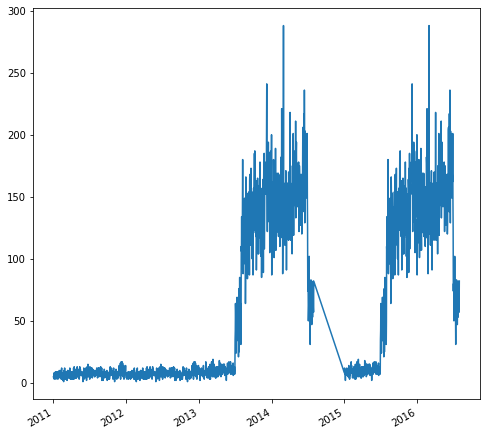

In [26]:
#How did sales evolve through the years?
df['calculated_data'].value_counts().plot.line(figsize=(8,8))

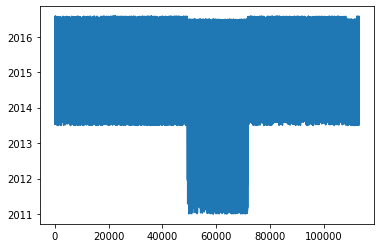

In [27]:

df['calculated_data'].plot.line()

In [28]:
# Increase 50 U$S revenue to every sale
df['Revenue']+=50

In [29]:
df['Revenue']

0         1000
1         1000
2         2451
3         2138
4          468
          ... 
113031     234
113032    1233
113033    1233
113034    1310
113035    1257
Name: Revenue, Length: 113036, dtype: int64

In [30]:
#How many orders were made in Canada or France?
df.loc[(df['Country']=='Canada')|(df['Country']=='France')]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,calculated_data
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
14,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,225,644,2013-08-02
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,517,315,882,2015-08-02
16,2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,148,90,288,2013-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112979,2015-09-08,8,September,2015,31,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",28,24,64,1048,672,1770,2015-09-08
113000,2014-07-27,27,July,2014,34,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",6,24,64,225,144,419,2014-07-27
113001,2016-07-27,27,July,2016,34,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",7,24,64,262,168,480,2016-07-27
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1310,2014-03-04


In [31]:

df.loc[(df['Country']=='Canada') & (df['Sub_Category']=='Bike Racks')]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,calculated_data
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
14,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,225,644,2013-08-02
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,517,315,882,2015-08-02
16,2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,148,90,288,2013-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2016-04-13,13,April,2016,40,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,148,90,288,2016-04-13
496,2014-04-30,30,April,2014,40,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,443,270,763,2014-04-30
497,2016-04-30,30,April,2016,40,Adults (35-64),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,225,644,2016-04-30
512,2013-08-25,25,August,2013,26,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,120,221,135,406,2013-08-25


In [32]:
#How many Bike Racks orders were made from Canada?
df.loc[(df['Country']=='Canada') & (df['Sub_Category']=='Bike Racks')].shape[0
                                                                             ]

104

In [33]:
#How many orders were made in each region (state) of France?
ax=df.loc[df['Country']=='France','State'].value_counts()

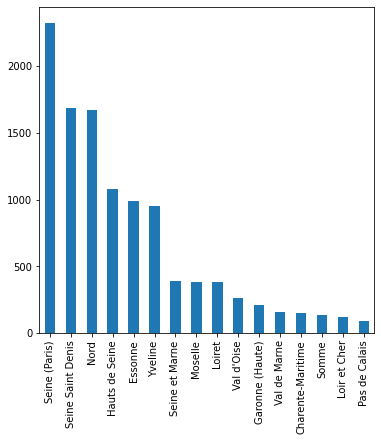

In [34]:
ax.plot.bar(figsize=(6,6))

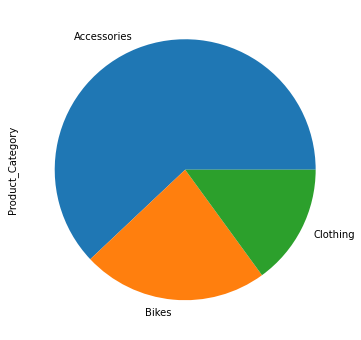

In [35]:
#How many sales were made per category?
df['Product_Category'].value_counts().plot.pie(figsize=(6,6))

In [36]:
#How many orders were made per accessory sub-categories?
ax=df.loc[df['Product_Category']=='Accessories','Sub_Category'].value_counts()
ax

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

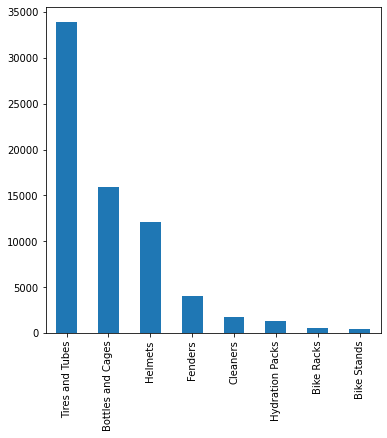

In [37]:
ax.plot.bar(figsize=(6,6))

In [38]:
#How many orders were made per bike sub-categories?
ax=df.loc[df['Product_Category']=='Bikes', 'Sub_Category'].value_counts()
ax

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

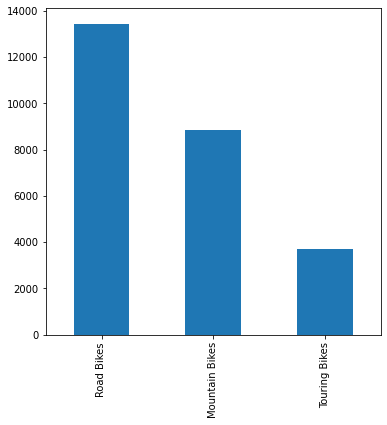

In [39]:

ax.plot.bar(figsize=(6,6))

In [40]:

#Which gender has the most amount of sales?
df.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'calculated_data'],
      dtype='object')

In [41]:

max(df['Customer_Gender'])

'M'

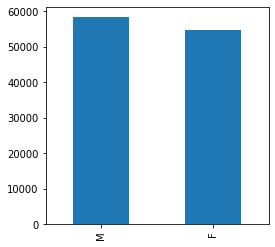

In [42]:

df['Customer_Gender'].value_counts().plot.bar(figsize=(4,4))

In [43]:
#How many sales with more than 500 in Revenue were made by men?
df['Revenue']

0         1000
1         1000
2         2451
3         2138
4          468
          ... 
113031     234
113032    1233
113033    1233
113034    1310
113035    1257
Name: Revenue, Length: 113036, dtype: int64

In [45]:
df.loc[(df['Customer_Gender']=='M')&(df['Revenue']==500)].shape[0]

50

In [50]:
#Get the top-5 sales with the highest revenue
df.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,calculated_data
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


In [63]:
#Get the sale with the highest revenue
ax=df['Revenue']== df['Revenue'].max()
df.loc[ax]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,calculated_data
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


In [83]:
#What is the mean Order_Quantity of orders with more than 10K in revenue?




In [82]:
df.loc[df['Revenue']> 10_000, 'Order_Quantity'].mean()

3.689265536723164

In [87]:
#What is the mean Order_Quantity of orders with less than 10K in revenue?


df.loc[df['Revenue']<10_000, 'Order_Quantity'].mean()

11.914539380997528

In [91]:

#How many orders were made in May of 2016

df.loc[(df['Year']== 2016)& (df['Month']=='May')].shape[0]


5015

In [99]:
ax=df.loc[(df['Year']== 2016)& (df['Month']=='May'),'Order_Quantity']
ax.shape[0]

5015

In [107]:
#How many orders were made between May and July of 2016?
df.loc[(df['Year']==2016)& (df['Month'].isin(['May','June','July']))].shape[0]

12164

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


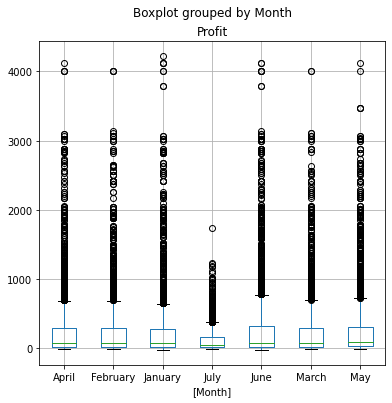

In [112]:
profit=df.loc[df['Year']==2016,['Profit','Month']]
profit.boxplot(by='Month',figsize=(6,6))

In [118]:
#Add 7.2% TAX on every sale Unit_Price within United States
df.loc[df['Country']=='United States','Unit_Price']*=1072